# Coding a Computer Vision Neural Network

## Model Handwriting Recognition

In [1]:
# importando o framework tensorflow no python
import tensorflow as tf

In [2]:
# baixando os dados de dígitos escritos a mão
mnist = tf.keras.datasets.mnist

In [3]:
# separando os dados de treinamento e dados de teste
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# visualizando as dimensões dos dados
print('training image shape:', training_images.shape)
print('training label shape:', training_labels.shape)
print('test image shape:', test_images.shape)
print('training label shape:', test_labels.shape)

training image shape: (60000, 28, 28)
training label shape: (60000,)
test image shape: (10000, 28, 28)
training label shape: (10000,)


training label: 5


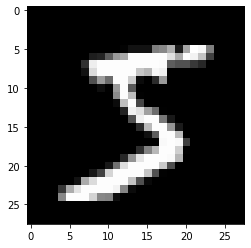

In [5]:
# visualizando um exemplo de formato da imagem
from matplotlib.pyplot import imshow

imshow(training_images[0], cmap = 'gray')
print('training label:', training_labels[0])

In [6]:
# definindo um limite de acurácia para a etapa de treinamento (callback)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [7]:
# criando um objeto da classe myCallback
callbacks = myCallback()

In [8]:
# normalizando os dados de treinamento e dados de teste
training_images = training_images / 255
test_images = test_images / 255

In [9]:
# definindo as camadas da rede neural profunda
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [10]:
# configurando os detalhes de compilação do modelo
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [13]:
# realizando o treinamento do modelo com os dados de treinamento
model.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0215 - accuracy: 0.9929

Reached 99% accuracy so cancelling training!


In [12]:
# testando a acurácia de generalização do modelo como os dados de teste
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0958 - accuracy: 0.9736


[0.09575898200273514, 0.9735999703407288]